In [7]:
# imports
import numpy as np
import matplotlib.pyplot as plt

## Solution

In [5]:
# Define basic parameters
RESET = -1        # Resting membrane potential
N = 100           # Number of neurons in the network
T = 5000          # Number of time steps for the simulation

# Initialize synaptic weight matrix
M = np.random.rand(N, N) - 0.5  # Create a random matrix for initial synaptic weights
M = M - M.T                     # Antisymmetric
M = M * 3.5

#M = rand(N)-0.5;     # Create a random matrix for initial synaptic weights
#M=M*5;               # Alternate initialization for random, non antisymmetric code.

M = M - np.mean(M)              # Centering the mean of the matrix to 0
print(np.std(M))                # Standard deviation of the matrix

# Initialize neuronal states
x = np.random.rand(N, 1)          # Initial membrane potentials for neurons, set randomly
s = np.random.rand(N, 1) > 0.5    # Initial spiking state, randomly assigning half the neurons to spike
x[s == 1] = RESET                 # Set membrane potentials of initially spiking neurons to the resting potential

# Preallocate arrays for performance
sv = np.zeros((N, T))  # Array to record spike events over time
xv = np.zeros((N, T))  # Array to record membrane potentials over time

# Main simulation loop
for i in range(T):
    # Update neuronal dynamics
    x = x + np.dot(M, s) + 0 * (np.random.rand(N, 1) - 0.3) - 0.01 * x  # Update membrane potentials with synaptic inputs, noise, and leakage

    # Determine spiking neurons
    s = (x > 1)                     # Neurons with a membrane potential above 1 are considered to be spiking
    x[s] = RESET                    # Reset membrane potentials of spiking neurons to RESET
    x[x < RESET] = RESET            # Ensure all potentials remain above the resting potential

    # Record data for later visualization
    sv[:, i] = s.flatten()          # Record spiking events
    xv[:, i] = x.flatten()          # Record membrane potentials




1.3991890888184684


### Plot

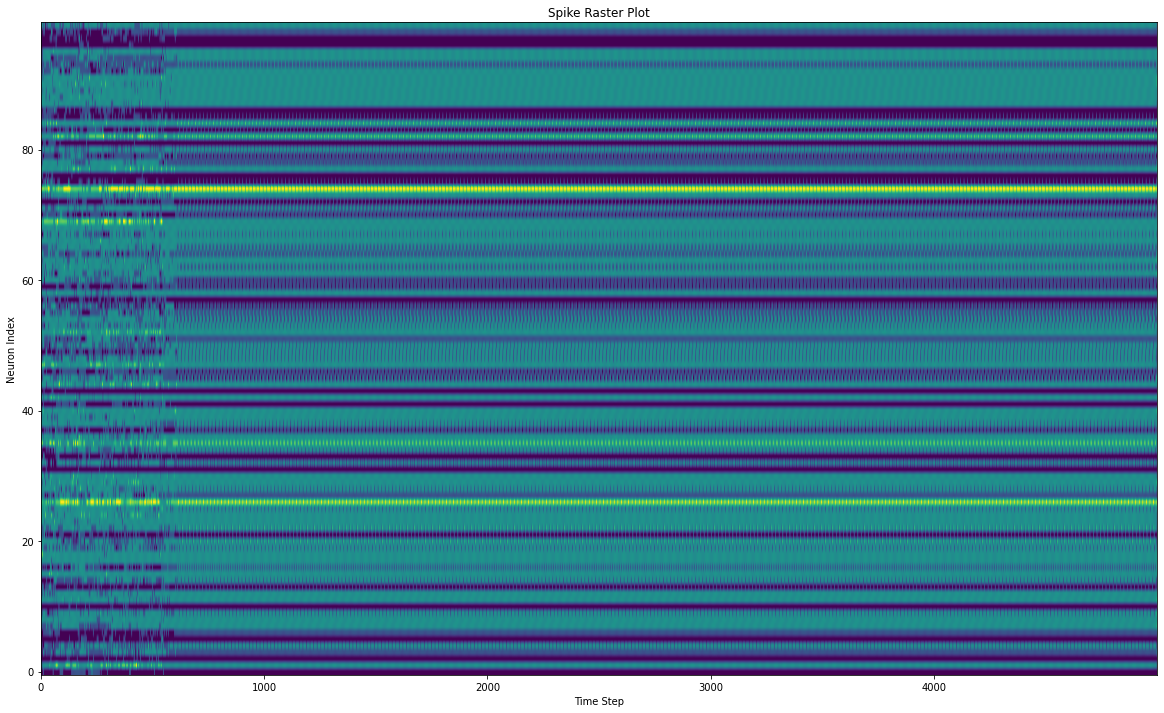

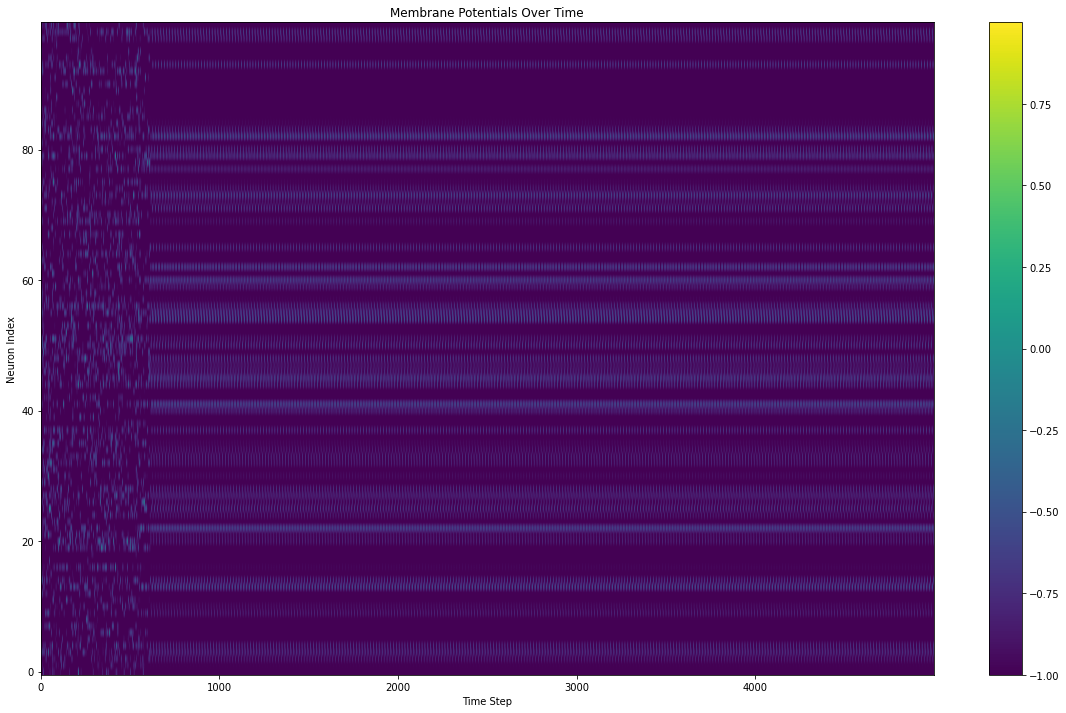

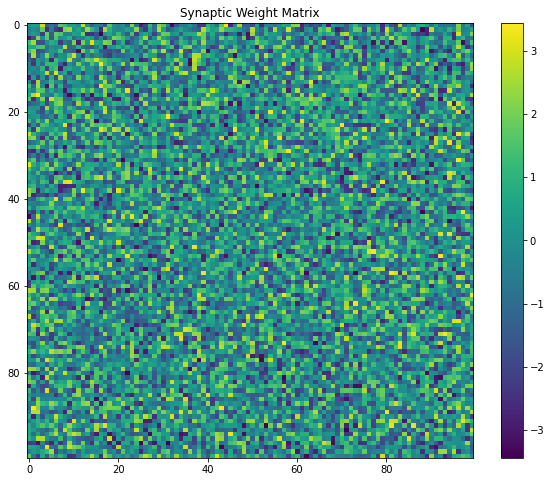

In [6]:

# Visualization
# Spike raster plot
plt.figure(1, figsize=(20, 12))

plt.imshow(sv, aspect='auto', origin='lower')
plt.title('Spike Raster Plot')
plt.xlabel('Time Step')
plt.ylabel('Neuron Index')


# Membrane potentials over time
plt.figure(2, figsize=(20, 12))

plt.imshow(xv, aspect='auto', origin='lower')
plt.colorbar()  # Display a color bar indicating the scale of membrane potentials
plt.title('Membrane Potentials Over Time')
plt.xlabel('Time Step')
plt.ylabel('Neuron Index')

# Synaptic weight matrix visualization
plt.figure(3, figsize=(10,8))
plt.imshow(M, aspect='auto')
plt.colorbar()  # Display a color bar indicating the scale of weights
plt.title('Synaptic Weight Matrix')
plt.show()

## Testing

In [ ]:
# Define basic parameters
RESET = -1        # Resting membrane potential
N = 100           # Number of neurons in the network
T = 5000          # Number of time steps for the simulation

# Initialize synaptic weight matrix
M = np.random.rand(N, N) - 0.5  # Create a random matrix for initial synaptic weights
M = M - M.T                     # Antisymmetric
M = M * 3.5

M -= np.mean(M)              # Centering the mean of the matrix to 0
print(np.std(M))                # Standard deviation of the matrix

# Initialize neuronal states
x = np.random.rand(N, 1)          # Initial membrane potentials for neurons, set randomly
s = np.random.rand(N, 1) > 0.5    # Initial spiking state, randomly assigning half the neurons to spike
x[s == 1] = RESET                 # Set membrane potentials of initially spiking neurons to the resting potential

# Preallocate arrays for performance
sv = np.zeros((N, T))  # Array to record spike events over time
xv = np.zeros((N, T))  # Array to record membrane potentials over time

# Main simulation loop
for i in range(T):
    # Update neuronal dynamics
    x = x + np.dot(M, s) + 0 * (np.random.rand(N, 1) - 0.3) - 0.01 * x  # Update membrane potentials with synaptic inputs, noise, and leakage

    # Determine spiking neurons
    s = (x > 1)                     # Neurons with a membrane potential above 1 are considered to be spiking
    x[s] = RESET                    # Reset membrane potentials of spiking neurons to RESET
    x[x < RESET] = RESET            # Ensure all potentials remain above the resting potential

    # Record data for later visualization
    sv[:, i] = s.flatten()          # Record spiking events
    xv[:, i] = x.flatten()          # Record membrane potentials
